In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import sys
#%matplotlib inline

from keras.layers import Input, Dense, Lambda, Flatten, Reshape, Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import Conv2DTranspose, LeakyReLU, BatchNormalization, Activation
from keras.models import Model
from keras import losses, regularizers
from keras import backend as K
from keras import metrics

from vis.visualization import visualize_activation, visualize_activation_with_losses
from vis.regularizers import TotalVariation, LPNorm
from vis.losses import ActivationMaximization
from vis.input_modifiers import Jitter
                                                                   
import h5py
import importlib

sys.path.append('../SourceCode')

import bastien_utils
import custom_regularizers

/home/bastien/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
FILE_PATH = "../"


img_rows, img_cols, img_chns = 28, 28, 1

if K.image_data_format() == 'channels_first':
    original_img_size = (img_chns, img_rows, img_cols)
else:
    original_img_size = (img_rows, img_cols, img_chns)

In [3]:
data = bastien_utils.load_data(FILE_PATH, train=True, test=True, subsetTest=True)
x_train, y_train, x_test, y_test, x_small, y_small = data
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('x_small shape:', x_small.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_small shape: (10, 28, 28, 1)


In [54]:
dir_models='../ShallowAE/Sparse/Models/'
model_path= dir_models + 'kl_dim100.h5'
AEsparseTest = SparseShallowAE.load(model_path)

In [55]:
H = AEsparseTest.encode(x_test)

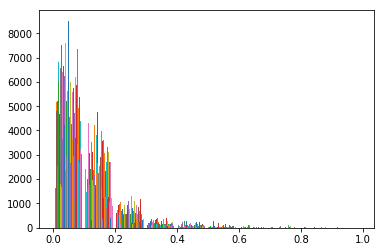

In [50]:
plt.hist(H,bins=20)
plt.show()

In [62]:
dir_models='../ShallowAE/Simple/Models/'
model_path= dir_models + 'dim10_sigE_lreluD_MSE.h5'
AEtest = ShallowAE.load(model_path)

In [52]:
H = AEtest.encode(x_test)

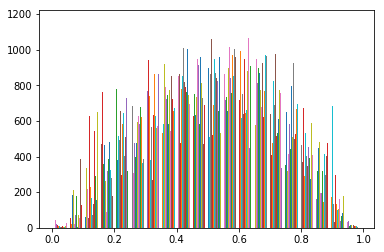

In [53]:
plt.hist(H,bins=20)
plt.show()

In [59]:
np.max(x_test)

1.0

In [74]:
H = AEtest.encode(x_test)
H_train, H_test, Y_train, Y_test = train_test_split(H, y_test, test_size=0.1)
C_range = np.logspace(-2, 4, 10)
gamma_range = np.logspace(-4, 2, 10)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
grid = GridSearchCV(svm.SVC(cache_size=800), param_grid=param_grid, cv=cv, verbose=2)
grid.fit(H_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ............................. C=0.01, gamma=0.0001, total=   5.8s
[CV] C=0.01, gamma=0.0001 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s


[CV] ............................. C=0.01, gamma=0.0001, total=   5.5s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ............................. C=0.01, gamma=0.0001, total=   5.5s
[CV] C=0.01, gamma=0.00046415888336127773 ............................
[CV] ............. C=0.01, gamma=0.00046415888336127773, total=   5.5s
[CV] C=0.01, gamma=0.00046415888336127773 ............................
[CV] ............. C=0.01, gamma=0.00046415888336127773, total=   5.5s
[CV] C=0.01, gamma=0.00046415888336127773 ............................
[CV] ............. C=0.01, gamma=0.00046415888336127773, total=   5.5s
[CV] C=0.01, gamma=0.002154434690031882 ..............................
[CV] ............... C=0.01, gamma=0.002154434690031882, total=   6.2s
[CV] C=0.01, gamma=0.002154434690031882 ..............................
[CV] ............... C=0.01, gamma=0.002154434690031882, total=   6.4s
[CV] C=0.01, gamma=0.002154434690031882 ..............................
[CV] .

[CV] .............. C=0.046415888336127774, gamma=100.0, total=   6.2s
[CV] C=0.21544346900318834, gamma=0.0001 .............................
[CV] .............. C=0.21544346900318834, gamma=0.0001, total=   5.9s
[CV] C=0.21544346900318834, gamma=0.0001 .............................
[CV] .............. C=0.21544346900318834, gamma=0.0001, total=   6.3s
[CV] C=0.21544346900318834, gamma=0.0001 .............................
[CV] .............. C=0.21544346900318834, gamma=0.0001, total=   5.8s
[CV] C=0.21544346900318834, gamma=0.00046415888336127773 .............
[CV]  C=0.21544346900318834, gamma=0.00046415888336127773, total=   5.7s
[CV] C=0.21544346900318834, gamma=0.00046415888336127773 .............
[CV]  C=0.21544346900318834, gamma=0.00046415888336127773, total=   6.7s
[CV] C=0.21544346900318834, gamma=0.00046415888336127773 .............
[CV]  C=0.21544346900318834, gamma=0.00046415888336127773, total=   6.4s
[CV] C=0.21544346900318834, gamma=0.002154434690031882 ...............


[CV] ............................... C=1.0, gamma=100.0, total=   8.7s
[CV] C=1.0, gamma=100.0 ..............................................
[CV] ............................... C=1.0, gamma=100.0, total=   9.3s
[CV] C=1.0, gamma=100.0 ..............................................
[CV] ............................... C=1.0, gamma=100.0, total=   8.8s
[CV] C=4.6415888336127775, gamma=0.0001 ..............................
[CV] ............... C=4.6415888336127775, gamma=0.0001, total=   5.9s
[CV] C=4.6415888336127775, gamma=0.0001 ..............................
[CV] ............... C=4.6415888336127775, gamma=0.0001, total=   5.8s
[CV] C=4.6415888336127775, gamma=0.0001 ..............................
[CV] ............... C=4.6415888336127775, gamma=0.0001, total=   5.4s
[CV] C=4.6415888336127775, gamma=0.00046415888336127773 ..............
[CV]  C=4.6415888336127775, gamma=0.00046415888336127773, total=   4.0s
[CV] C=4.6415888336127775, gamma=0.00046415888336127773 ..............
[CV] 

[CV] ..... C=21.54434690031882, gamma=21.54434690031882, total=   5.7s
[CV] C=21.54434690031882, gamma=21.54434690031882 ....................
[CV] ..... C=21.54434690031882, gamma=21.54434690031882, total=   5.4s
[CV] C=21.54434690031882, gamma=100.0 ................................
[CV] ................. C=21.54434690031882, gamma=100.0, total=   8.1s
[CV] C=21.54434690031882, gamma=100.0 ................................
[CV] ................. C=21.54434690031882, gamma=100.0, total=   8.0s
[CV] C=21.54434690031882, gamma=100.0 ................................
[CV] ................. C=21.54434690031882, gamma=100.0, total=   8.6s
[CV] C=100.0, gamma=0.0001 ...........................................
[CV] ............................ C=100.0, gamma=0.0001, total=   2.4s
[CV] C=100.0, gamma=0.0001 ...........................................
[CV] ............................ C=100.0, gamma=0.0001, total=   2.5s
[CV] C=100.0, gamma=0.0001 ...........................................
[CV] .

[CV] ..... C=464.1588833612773, gamma=4.641588833612772, total=   2.2s
[CV] C=464.1588833612773, gamma=21.54434690031882 ....................
[CV] ..... C=464.1588833612773, gamma=21.54434690031882, total=   5.5s
[CV] C=464.1588833612773, gamma=21.54434690031882 ....................
[CV] ..... C=464.1588833612773, gamma=21.54434690031882, total=   5.9s
[CV] C=464.1588833612773, gamma=21.54434690031882 ....................
[CV] ..... C=464.1588833612773, gamma=21.54434690031882, total=   5.7s
[CV] C=464.1588833612773, gamma=100.0 ................................
[CV] ................. C=464.1588833612773, gamma=100.0, total=   8.4s
[CV] C=464.1588833612773, gamma=100.0 ................................
[CV] ................. C=464.1588833612773, gamma=100.0, total=   8.4s
[CV] C=464.1588833612773, gamma=100.0 ................................
[CV] ................. C=464.1588833612773, gamma=100.0, total=   8.4s
[CV] C=2154.4346900318824, gamma=0.0001 ..............................
[CV] .

[CV] ............... C=10000.0, gamma=4.641588833612772, total=   2.6s
[CV] C=10000.0, gamma=4.641588833612772 ..............................
[CV] ............... C=10000.0, gamma=4.641588833612772, total=   2.5s
[CV] C=10000.0, gamma=4.641588833612772 ..............................
[CV] ............... C=10000.0, gamma=4.641588833612772, total=   2.7s
[CV] C=10000.0, gamma=21.54434690031882 ..............................
[CV] ............... C=10000.0, gamma=21.54434690031882, total=   6.3s
[CV] C=10000.0, gamma=21.54434690031882 ..............................
[CV] ............... C=10000.0, gamma=21.54434690031882, total=   6.1s
[CV] C=10000.0, gamma=21.54434690031882 ..............................
[CV] ............... C=10000.0, gamma=21.54434690031882, total=   5.9s
[CV] C=10000.0, gamma=100.0 ..........................................
[CV] ........................... C=10000.0, gamma=100.0, total=   9.1s
[CV] C=10000.0, gamma=100.0 ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 29.0min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=800, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': array([1.00000e-04, 4.64159e-04, 2.15443e-03, 1.00000e-02, 4.64159e-02,
       2.15443e-01, 1.00000e+00, 4.64159e+00, 2.15443e+01, 1.00000e+02]), 'C': array([1.00000e-02, 4.64159e-02, 2.15443e-01, 1.00000e+00, 4.64159e+00,
       2.15443e+01, 1.00000e+02, 4.64159e+02, 2.15443e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [80]:
np.logspace(-2, 3, 10)

array([1.00000000e-02, 3.59381366e-02, 1.29154967e-01, 4.64158883e-01,
       1.66810054e+00, 5.99484250e+00, 2.15443469e+01, 7.74263683e+01,
       2.78255940e+02, 1.00000000e+03])

In [69]:
# log(C) and log(gamma) between -3 and 3, 6 values each 
pd.DataFrame(grid.cv_results_)

/home/bastien/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/bastien/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/bastien/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/bastien/anaconda3/lib/py

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,4.975849,0.601980,0.101111,0.101111,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",25,0.101111,0.101111,0.101111,0.101111,0.101111,0.101111,0.022185,0.000258,0.000000,0.000000
1,4.930439,0.602823,0.101111,0.101111,0.001,0.0158489,"{'C': 0.001, 'gamma': 0.015848931924611134}",25,0.101111,0.101111,0.101111,0.101111,0.101111,0.101111,0.008998,0.000548,0.000000,0.000000
2,5.029385,0.616824,0.101111,0.101111,0.001,0.251189,"{'C': 0.001, 'gamma': 0.25118864315095796}",25,0.101111,0.101111,0.101111,0.101111,0.101111,0.101111,0.062995,0.016381,0.000000,0.000000
3,5.006364,0.621557,0.101111,0.101111,0.001,3.98107,"{'C': 0.001, 'gamma': 3.981071705534969}",25,0.101111,0.101111,0.101111,0.101111,0.101111,0.101111,0.046005,0.014873,0.000000,0.000000
4,5.882826,0.612065,0.101111,0.101111,0.001,63.0957,"{'C': 0.001, 'gamma': 63.0957344480193}",25,0.101111,0.101111,0.101111,0.101111,0.101111,0.101111,0.026932,0.006983,0.000000,0.000000
5,4.539273,0.580368,0.101111,0.101111,0.001,1000,"{'C': 0.001, 'gamma': 1000.0}",25,0.101111,0.101111,0.101111,0.101111,0.101111,0.101111,0.005535,0.000336,0.000000,0.000000
6,4.926711,0.603126,0.101111,0.101111,0.0158489,0.001,"{'C': 0.015848931924611134, 'gamma': 0.001}",25,0.101111,0.101111,0.101111,0.101111,0.101111,0.101111,0.009900,0.000724,0.000000,0.000000
7,4.941590,0.603190,0.101111,0.101111,0.0158489,0.0158489,"{'C': 0.015848931924611134, 'gamma': 0.0158489...",25,0.101111,0.101111,0.101111,0.101111,0.101111,0.101111,0.030537,0.000160,0.000000,0.000000
8,3.114118,0.577278,0.685185,0.677269,0.0158489,0.251189,"{'C': 0.015848931924611134, 'gamma': 0.2511886...",15,0.681667,0.678056,0.686667,0.677639,0.687222,0.676111,0.037050,0.008877,0.002498,0.000836
9,3.771222,0.566266,0.712407,0.716528,0.0158489,3.98107,"{'C': 0.015848931924611134, 'gamma': 3.9810717...",14,0.716111,0.717778,0.716111,0.713611,0.705000,0.718194,0.203148,0.028556,0.005238,0.002069


In [72]:
grid.score(H_test, Y_test)

0.82

In [75]:
# log(C) between -2 and 4, and log(gamma) between -3 and 2, 10 values each 
pd.DataFrame(grid.cv_results_)

/home/bastien/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/bastien/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/bastien/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/bastien/anaconda3/lib/py

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,4.931050,0.638630,0.102222,0.102083,0.01,0.0001,"{'C': 0.01, 'gamma': 0.0001}",90,0.102222,0.102083,0.102222,0.102083,0.102222,0.102083,0.074683,0.054286,0.000000,1.387779e-17
1,4.893769,0.601172,0.102222,0.102083,0.01,0.000464159,"{'C': 0.01, 'gamma': 0.00046415888336127773}",90,0.102222,0.102083,0.102222,0.102083,0.102222,0.102083,0.022487,0.000391,0.000000,1.387779e-17
2,5.529449,0.629505,0.102222,0.102083,0.01,0.00215443,"{'C': 0.01, 'gamma': 0.002154434690031882}",90,0.102222,0.102083,0.102222,0.102083,0.102222,0.102083,0.160326,0.014939,0.000000,1.387779e-17
3,5.428850,0.708242,0.102222,0.102083,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",90,0.102222,0.102083,0.102222,0.102083,0.102222,0.102083,0.246988,0.130998,0.000000,1.387779e-17
4,5.033756,0.609235,0.191852,0.191574,0.01,0.0464159,"{'C': 0.01, 'gamma': 0.046415888336127774}",87,0.191667,0.196667,0.190556,0.186389,0.193333,0.191667,0.190373,0.002753,0.001142,4.196396e-03
5,4.169593,0.600953,0.649444,0.645046,0.01,0.215443,"{'C': 0.01, 'gamma': 0.21544346900318823}",73,0.650000,0.644028,0.643333,0.647222,0.655000,0.643889,0.199716,0.002371,0.004779,1.539656e-03
6,3.126952,0.558957,0.707593,0.698704,0.01,1,"{'C': 0.01, 'gamma': 1.0}",66,0.707222,0.698889,0.701667,0.701944,0.713889,0.695278,0.193581,0.008975,0.004997,2.724804e-03
7,4.274524,0.588614,0.655370,0.654259,0.01,4.64159,"{'C': 0.01, 'gamma': 4.641588833612772}",72,0.658333,0.655556,0.652778,0.656250,0.655000,0.650972,0.051921,0.019039,0.002283,2.341513e-03
8,5.309340,0.643012,0.150370,0.152222,0.01,21.5443,"{'C': 0.01, 'gamma': 21.54434690031882}",88,0.150556,0.149028,0.149444,0.152639,0.151111,0.155000,0.184215,0.039443,0.000693,2.455887e-03
9,5.782183,0.629891,0.102222,0.102083,0.01,100,"{'C': 0.01, 'gamma': 100.0}",90,0.102222,0.102083,0.102222,0.102083,0.102222,0.102083,0.151057,0.034219,0.000000,1.387779e-17


In [76]:
grid.score(H_test, Y_test)

0.798

In [77]:
grid.best_score_

0.8094444444444444

In [78]:
grid.best_params_

{'C': 4.6415888336127775, 'gamma': 1.0}

In [81]:
grid.grid_scores_[params: {'C': 0.01, 'gamma': 0.0001}]

/home/bastien/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.10222, std: 0.00000, params: {'C': 0.01, 'gamma': 0.0001},
 mean: 0.10222, std: 0.00000, params: {'C': 0.01, 'gamma': 0.00046415888336127773},
 mean: 0.10222, std: 0.00000, params: {'C': 0.01, 'gamma': 0.002154434690031882},
 mean: 0.10222, std: 0.00000, params: {'C': 0.01, 'gamma': 0.01},
 mean: 0.19185, std: 0.00114, params: {'C': 0.01, 'gamma': 0.046415888336127774},
 mean: 0.64944, std: 0.00478, params: {'C': 0.01, 'gamma': 0.21544346900318823},
 mean: 0.70759, std: 0.00500, params: {'C': 0.01, 'gamma': 1.0},
 mean: 0.65537, std: 0.00228, params: {'C': 0.01, 'gamma': 4.641588833612772},
 mean: 0.15037, std: 0.00069, params: {'C': 0.01, 'gamma': 21.54434690031882},
 mean: 0.10222, std: 0.00000, params: {'C': 0.01, 'gamma': 100.0},
 mean: 0.10222, std: 0.00000, params: {'C': 0.046415888336127774, 'gamma': 0.0001},
 mean: 0.10222, std: 0.00000, params: {'C': 0.046415888336127774, 'gamma': 0.00046415888336127773},
 mean: 0.10222, std: 0.00000, params: {'C': 0.04641588833612777

In [83]:
dir_models='../ShallowAE/Simple/Models/'
model_path= dir_models + 'dim10_sigE_lreluD_MSE.h5'
AEtest = ShallowAE.load(model_path)

In [86]:
AEtest.best_SVM_classification_score(x_test, y_test)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   9.4s
[CV] C=0.01, gamma=0.001 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.7s remaining:    0.0s


[CV] .............................. C=0.01, gamma=0.001, total=   9.4s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   8.8s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ............................... C=0.01, gamma=0.01, total=   9.1s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ............................... C=0.01, gamma=0.01, total=   8.8s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ............................... C=0.01, gamma=0.01, total=   8.6s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   8.4s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   9.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] .

[CV] ............................... C=10.0, gamma=0.01, total=   2.3s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................................ C=10.0, gamma=0.1, total=   1.9s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................................ C=10.0, gamma=0.1, total=   1.9s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................................ C=10.0, gamma=0.1, total=   1.8s
[CV] C=10.0, gamma=1.0 ...............................................
[CV] ................................ C=10.0, gamma=1.0, total=   1.8s
[CV] C=10.0, gamma=1.0 ...............................................
[CV] ................................ C=10.0, gamma=1.0, total=   1.8s
[CV] C=10.0, gamma=1.0 ...............................................
[CV] ................................ C=10.0, gamma=1.0, total=   1.8s
[CV] C=10.0, gamma=10.0 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 14.7min finished


0.815

In [68]:
import pandas as pd

In [ ]:
AE_test = 